In [1]:
##Import all the libraries
import pandas as pd
from bs4 import BeautifulSoup as BS
import requests
import urllib3
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [68]:
## Read all the pages and url
pg_2016 = 154
pg_2017 = 147
pg_2018 = 85
pg_2019 = 113
pg_half_2016 = 898
pg_half_2017 = 892
pg_half_2018 = 598
pg_half_2019 = 690

url_2019 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2019-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
url_2018 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2018-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
url_2017 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2017-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
url_2016 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2016-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
url_half_2019 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2019-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
url_half_2018 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2018-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
url_half_2017 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2017-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
url_half_2016 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2016-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='

In [44]:
##function for getting  Marathon results
def get_url(page,base):
    website_df = pd.DataFrame(columns = ['Overall','Bib','Name','Time'])
    for page in range(1, page+1):
        url = base + str(page)
        result = requests.post(url)
        soup = BS(result.text)
        tables = soup.find_all("table", attrs = {"class":"table table-responsive table-bordered"})
        results_list = pd.read_html(str(tables[0]))
        result_df =results_list[0]
        website_df = website_df.append(result_df)
    return website_df

In [49]:
##return Marathon2019
marathon2019_df = get_url(113,url_2019)

In [50]:
marathon2019_df.shape

(2811, 4)

In [51]:
##return Marathon 2018
marathon2018_df = get_url(85,url_2018)

In [33]:
marathon2018_df.shape

(2115, 4)

In [52]:
##return Marathon 2017
marathon2017_df = get_url(147,url_2017)

In [53]:
marathon2017_df.shape

(3651, 4)

In [54]:
##return Marathon 2016
marathon2016_df = get_url(154,url_2016)

In [37]:
marathon2016_df.shape

(3842, 4)

In [55]:
##return marathon 2019
half_marathon2019_df = get_url(690,url_half_2019)

In [56]:
half_marathon2019_df.shape

(17236, 4)

In [57]:
## Half marathon
half_marathon2018_df = get_url(598,url_half_2018)

In [59]:
half_marathon2018_df.shape

(14940, 4)

In [60]:
## half marathon 2017
half_marathon2017_df = get_url(892,url_half_2017)

In [61]:
half_marathon2017_df.shape

(22292, 4)

In [69]:
## half_marathon2016
half_marathon2016_df = get_url(898,url_half_2016)

In [70]:
half_marathon2016_df.shape

(22429, 4)

In [71]:
marathon2019_df['Year'] = 2019

In [72]:
marathon2018_df['Year'] = 2018

In [73]:
marathon2017_df['Year'] = 2017

In [74]:
marathon2016_df['Year'] = 2016

In [75]:
half_marathon2016_df['Year'] = 2016

In [76]:
half_marathon2017_df['Year'] = 2017

In [77]:
half_marathon2018_df['Year'] = 2018

In [78]:
half_marathon2019_df['Year'] = 2019

In [80]:
marathon2019_df.tail()

,Overall,Bib,Name,Time,Year
6,99999,30304,Kevin Fox,00:00:00,2019
7,99999,31936,Scott Newell,00:00:00,2019
8,99999,32183,Clarisa Horton,00:00:00,2019
9,99999,31656,Tony Amburgy,00:00:00,2019
10,99999,32258,Krista Zanetti,00:00:00,2019


In [81]:
##concatenating all the full marathon
full_df = pd.concat([marathon2016_df,marathon2017_df,marathon2018_df,marathon2019_df],ignore_index=True)

In [82]:
##concatenating all the half_marathon
half_df = pd.concat([half_marathon2016_df,half_marathon2017_df,half_marathon2018_df,half_marathon2019_df],ignore_index=True)
half_df.head()

,Overall,Bib,Name,Time,Year
0,1,201,Roosevelt Cook,01:11:15,2016
1,2,204,Bill Martin,01:11:50,2016
2,3,1623,Cody Hodgins,01:13:43,2016
3,4,1222,Andrew Archer,01:15:04,2016
4,5,1224,Brian Syring,01:15:30,2016


In [85]:
## max time for half marathon
half_df.Time.max()

'06:26:37'

In [87]:
full_df.shape

(12419, 5)

In [88]:
half_df.shape

(76897, 5)

In [89]:
##convert time into datetime
full_df['Time']=pd.to_datetime(full_df.Time )

In [178]:
##convert time into datetime
half_df['Time']=pd.to_datetime(half_df.Time)

In [179]:
half_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76897 entries, 0 to 76896
Data columns (total 5 columns):
Overall    76897 non-null object
Bib        76897 non-null object
Name       76897 non-null object
Time       76897 non-null datetime64[ns]
Year       76897 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.9+ MB


In [92]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12419 entries, 0 to 12418
Data columns (total 5 columns):
Overall    12419 non-null object
Bib        12419 non-null object
Name       12419 non-null object
Time       12419 non-null datetime64[ns]
Year       12419 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 485.2+ KB


In [94]:
full_df.Name.describe()

count           12419
unique          11276
top       Brett Smith
freq                6
Name: Name, dtype: object

In [104]:
##drop all the records whose time is zero
notcompleted = full_df[full_df['Time'] == '2019-09-26 00:00:00'].index
full_df = full_df.drop(notcompleted, inplace=False)

In [105]:
full_df.shape

(9705, 5)

In [106]:
half_df.shape

(76897, 5)

In [108]:
half_df.head()

,Overall,Bib,Name,Time,Year
0,1,201,Roosevelt Cook,2019-09-26 01:11:15,2016
1,2,204,Bill Martin,2019-09-26 01:11:50,2016
2,3,1623,Cody Hodgins,2019-09-26 01:13:43,2016
3,4,1222,Andrew Archer,2019-09-26 01:15:04,2016
4,5,1224,Brian Syring,2019-09-26 01:15:30,2016


In [109]:
## drop all the rows with zero time
zero = half_df[half_df['Time'] == '2019-09-26 00:00:00'].index
half_df = half_df.drop(zero, inplace=False)

In [110]:
half_df.shape

(64278, 5)

In [113]:
ascending = full_df.sort_values('Time',ascending = True, inplace = True)
ascending

In [115]:
full_df.head(10)

,Overall,Bib,Name,Time,Year
7387,99999,27024,James Cook,2019-09-26 01:26:11,2017
9608,1,30001,Travis Peruski,2019-09-26 01:37:54,2019
6311,99999,1202,Andre Mcdonald,2019-09-26 02:08:22,2017
6660,99999,15476,Ashley Grindstaff,2019-09-26 02:19:14,2017
7000,99999,1163,Reon Holloway,2019-09-26 02:22:41,2017
3461,99999,4109,Bruce Kesselring,2019-09-26 02:24:09,2016
6508,99999,2104,George Spilich,2019-09-26 02:24:21,2017
6524,99999,15071,Kenneth Moffat,2019-09-26 02:25:00,2017
0,1,1,Scott Wietecha,2019-09-26 02:25:42,2016
7493,1,1,Scott Wietecha,2019-09-26 02:28:16,2018


In [125]:
marathon2016_df['Time']=pd.to_datetime(marathon2016_df.Time )

In [147]:
##convert time into minutes
full_df['Minutes']=full_df['Time'].dt.hour * 60 + full_df['Time'].dt.minute

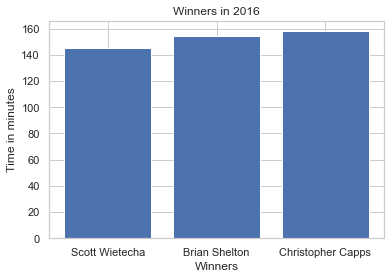

In [142]:
## get the time diff for top 3 runners
plt.xlabel('Winners')
plt.ylabel('Time in minutes')
plt.title('Winners in 2016')
plt.savefig('winners in 2016 full Marathon')



In [143]:
marathon2019_df.head()

,Overall,Bib,Name,Time,Year
0,1,30001,Travis Peruski,01:37:54,2019
1,2,1,Scott Wietecha,02:34:59,2019
2,3,4,Jordan Wilson,02:35:24,2019
3,4,30034,Steelton Flynn,02:39:59,2019
4,5,30035,Thomas Ellis,02:42:09,2019


In [144]:
marathon2018_df.head()

,Overall,Bib,Name,Time,Year
0,1,1,Scott Wietecha,02:28:16,2018
1,2,3,Garang Madut,02:29:52,2018
2,3,33442,Kevin Fink,02:38:59,2018
3,4,33441,Andrew Hodges,02:43:59,2018
4,5,30028,Nicholas Aubert,02:48:11,2018


In [145]:
marathon2017_df.head()

,Overall,Bib,Name,Time,Year
0,1,1,Scott Wietecha,02:40:25,2017
1,2,1145,Ryan Regnier,02:56:28,2017
2,3,1147,Daniel Everett,03:00:55,2017
3,4,1029,Khris Vickroy,03:04:47,2017
4,5,1119,Marcus Dilallo,03:04:53,2017


In [146]:
marathon2016_df.head()

,Overall,Bib,Name,Time,Year
0,1,1,Scott Wietecha,2019-09-27 02:25:42,2016
1,2,3,Brian Shelton,2019-09-27 02:34:43,2016
2,3,1047,Christopher Capps,2019-09-27 02:38:43,2016
3,4,1052,Jason Grimes,2019-09-27 02:45:06,2016
4,5,1046,David Adams,2019-09-27 02:47:28,2016


In [148]:
Winners = full_df[full_df['Name'].isin (['Scott Wietecha','Brian Shelton','Ryan Regnier','Garang Madut','Jordan Wilson'])]

In [149]:
Winners

,Overall,Bib,Name,Time,Year,Minutes
0,1,1,Scott Wietecha,2019-09-26 02:25:42,2016,145
7493,1,1,Scott Wietecha,2019-09-26 02:28:16,2018,148
7494,2,3,Garang Madut,2019-09-26 02:29:52,2018,149
1,2,3,Brian Shelton,2019-09-26 02:34:43,2016,154
9609,2,1,Scott Wietecha,2019-09-26 02:34:59,2019,154
9610,3,4,Jordan Wilson,2019-09-26 02:35:24,2019,155
3842,1,1,Scott Wietecha,2019-09-26 02:40:25,2017,160
3843,2,1145,Ryan Regnier,2019-09-26 02:56:28,2017,176


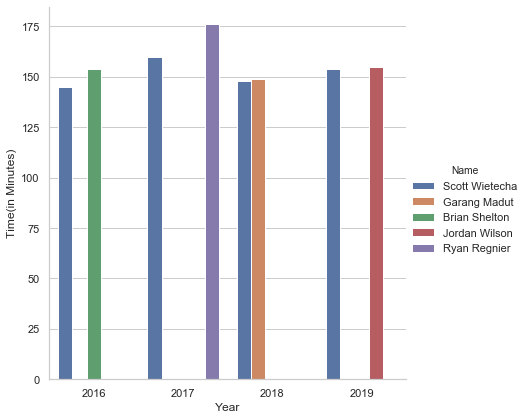

In [291]:
##create a list of winners and runner up for all the year and plot it.
#x =['Scott Wietecha','Brian Shelton','Scott Wietecha','Ryan Regnier','Scott Wietecha','Garang Madut','Scott Wietecha','Jordan Wilson']
#y =[145,154,160,176,148,149,154,155]
##g = sns.lmplot(x="Year", y="Minutes", hue="Name",
               ##truncate=True, height=6, data=Winners)
g = sns.catplot(x="Year", y="Minutes", hue="Name", data=Winners,kind="bar",height=6);
g.set_axis_labels("Year", "Time(in Minutes)")
g.savefig("winners time.png")



In [191]:
## count of people who participated in half_marathon in all year
df_regulars =half_marathon2016_df.merge(half_marathon2017_df, on='Name', how='inner', suffixes=('2016', '2017')).merge(half_marathon2018_df, on='Name', how='inner', suffixes=('2017', '2018')).merge(half_marathon2019_df, on='Name', how='inner', suffixes=('2018', '2019'))

In [192]:
df_regulars

,Overall2016,Bib2016,Name,Time2016,Year2016,Overall2017,Bib2017,Time2017,Year2017,Overall2018,Bib2018,Time2018,Year2018,Overall2019,Bib2019,Time2019,Year2019
0,8,1218,Nick French,01:17:11,2016,3,206,01:11:42,2017,3,105,01:10:38,2018,1,31,01:10:03,2019
1,22,1629,Phillip Riemer,01:22:54,2016,24,1685,01:25:25,2017,10,1036,01:17:47,2018,99999,1034,00:00:00,2019
2,31,1283,Brandon Peterson,01:24:32,2016,33,1545,01:27:28,2017,26,1083,01:22:33,2018,24,1088,01:24:09,2019
3,32,1253,Joseph Lang,01:24:57,2016,25,1574,01:25:40,2017,32,1052,01:23:10,2018,99999,1059,00:00:00,2019
4,66,1302,Brad Averitt,01:28:23,2016,41,1493,01:28:53,2017,66,1080,01:28:20,2018,12,1073,01:19:33,2019
5,98,2674,Jeremy Kane,01:30:13,2016,157,1452,01:38:20,2017,109,1121,01:31:14,2018,194,1084,01:35:56,2019
6,101,2241,Michael Moore,01:30:20,2016,11193,27664,02:50:53,2017,12349,13366,03:02:54,2018,1912,8216,01:57:10,2019
7,101,2241,Michael Moore,01:30:20,2016,99999,1428,00:00:00,2017,12349,13366,03:02:54,2018,1912,8216,01:57:10,2019
8,978,4450,Michael Moore,01:48:03,2016,11193,27664,02:50:53,2017,12349,13366,03:02:54,2018,1912,8216,01:57:10,2019
9,978,4450,Michael Moore,01:48:03,2016,99999,1428,00:00:00,2017,12349,13366,03:02:54,2018,1912,8216,01:57:10,2019


In [189]:
##zero1 = df_regulars[df_regulars['Time2016'] == '00:00:00'].index
##df_regulars= df_regulars.drop(zero1, inplace=False)

In [190]:
df_regulars

,Overall2016,Bib2016,Name,Time2016,Year2016,Overall2017,Bib2017,Time2017,Year2017,Overall2018,Bib2018,Time2018,Year2018,Overall2019,Bib2019,Time2019,Year2019
0,8,1218,Nick French,01:17:11,2016,3,206,01:11:42,2017,3,105,01:10:38,2018,1,31,01:10:03,2019
1,22,1629,Phillip Riemer,01:22:54,2016,24,1685,01:25:25,2017,10,1036,01:17:47,2018,99999,1034,00:00:00,2019
2,31,1283,Brandon Peterson,01:24:32,2016,33,1545,01:27:28,2017,26,1083,01:22:33,2018,24,1088,01:24:09,2019
3,32,1253,Joseph Lang,01:24:57,2016,25,1574,01:25:40,2017,32,1052,01:23:10,2018,99999,1059,00:00:00,2019
4,66,1302,Brad Averitt,01:28:23,2016,41,1493,01:28:53,2017,66,1080,01:28:20,2018,12,1073,01:19:33,2019
5,98,2674,Jeremy Kane,01:30:13,2016,157,1452,01:38:20,2017,109,1121,01:31:14,2018,194,1084,01:35:56,2019
6,101,2241,Michael Moore,01:30:20,2016,11193,27664,02:50:53,2017,12349,13366,03:02:54,2018,1912,8216,01:57:10,2019
7,101,2241,Michael Moore,01:30:20,2016,99999,1428,00:00:00,2017,12349,13366,03:02:54,2018,1912,8216,01:57:10,2019
8,978,4450,Michael Moore,01:48:03,2016,11193,27664,02:50:53,2017,12349,13366,03:02:54,2018,1912,8216,01:57:10,2019
9,978,4450,Michael Moore,01:48:03,2016,99999,1428,00:00:00,2017,12349,13366,03:02:54,2018,1912,8216,01:57:10,2019


In [270]:
zero1=df_regulars[(df_regulars['Time2019'] == '00:00:00')].index
df_regulars= df_regulars.drop(zero1, inplace=False)

In [271]:
df_regulars

,Overall2016,Bib2016,Name,Time2016,Year2016,Overall2017,Bib2017,Time2017,Year2017,Overall2018,Bib2018,Time2018,Year2018,Overall2019,Bib2019,Time2019,Year2019
0,8,1218,Nick French,01:17:11,2016,3,206,01:11:42,2017,3,105,01:10:38,2018,1,31,01:10:03,2019
2,31,1283,Brandon Peterson,01:24:32,2016,33,1545,01:27:28,2017,26,1083,01:22:33,2018,24,1088,01:24:09,2019
4,66,1302,Brad Averitt,01:28:23,2016,41,1493,01:28:53,2017,66,1080,01:28:20,2018,12,1073,01:19:33,2019
5,98,2674,Jeremy Kane,01:30:13,2016,157,1452,01:38:20,2017,109,1121,01:31:14,2018,194,1084,01:35:56,2019
6,101,2241,Michael Moore,01:30:20,2016,11193,27664,02:50:53,2017,12349,13366,03:02:54,2018,1912,8216,01:57:10,2019
12,105,1651,Pavlo Gilchuk,01:30:29,2016,88,1625,01:34:58,2017,125,17445,01:32:09,2018,153,16688,01:34:28,2019
13,115,1398,Caleb Cook,01:31:21,2016,135,1314,01:37:20,2017,161,19522,01:33:34,2018,45,1318,01:27:06,2019
14,164,1339,Matthew Keppler,01:33:58,2016,147,1311,01:37:57,2017,323,1458,01:39:02,2018,329,1375,01:39:47,2019
15,166,2695,Trey Harwell,01:34:04,2016,112,1301,01:36:20,2017,224,1295,01:36:08,2018,322,1361,01:39:40,2019
16,178,406,Bart Modrall,01:34:16,2016,261,430,01:42:11,2017,196,519,01:35:01,2018,193,112,01:35:56,2019


In [272]:
##drop all the zero time from all the year
df_regulars.count()

Overall2016    809
Bib2016        809
Name           809
Time2016       809
Year2016       809
Overall2017    809
Bib2017        809
Time2017       809
Year2017       809
Overall2018    809
Bib2018        809
Time2018       809
Year2018       809
Overall2019    809
Bib2019        809
Time2019       809
Year2019       809
dtype: int64

In [263]:
##Drop all the duplicates
df_faster = df_.drop_duplicates(subset=['Name'])
df_faster

,Overall2016,Bib2016,Name,Time2016,Year2016,Overall2017,Bib2017,Time2017,Year2017,Overall2018,Bib2018,Time2018,Year2018,Overall2019,Bib2019,Time2019,Year2019
0,8,1218,Nick French,01:17:11,2016,3,206,01:11:42,2017,3,105,01:10:38,2018,1,31,01:10:03,2019
2,31,1283,Brandon Peterson,01:24:32,2016,33,1545,01:27:28,2017,26,1083,01:22:33,2018,24,1088,01:24:09,2019
4,66,1302,Brad Averitt,01:28:23,2016,41,1493,01:28:53,2017,66,1080,01:28:20,2018,12,1073,01:19:33,2019
5,98,2674,Jeremy Kane,01:30:13,2016,157,1452,01:38:20,2017,109,1121,01:31:14,2018,194,1084,01:35:56,2019
6,101,2241,Michael Moore,01:30:20,2016,11193,27664,02:50:53,2017,12349,13366,03:02:54,2018,1912,8216,01:57:10,2019
12,105,1651,Pavlo Gilchuk,01:30:29,2016,88,1625,01:34:58,2017,125,17445,01:32:09,2018,153,16688,01:34:28,2019
13,115,1398,Caleb Cook,01:31:21,2016,135,1314,01:37:20,2017,161,19522,01:33:34,2018,45,1318,01:27:06,2019
14,164,1339,Matthew Keppler,01:33:58,2016,147,1311,01:37:57,2017,323,1458,01:39:02,2018,329,1375,01:39:47,2019
15,166,2695,Trey Harwell,01:34:04,2016,112,1301,01:36:20,2017,224,1295,01:36:08,2018,322,1361,01:39:40,2019
16,178,406,Bart Modrall,01:34:16,2016,261,430,01:42:11,2017,196,519,01:35:01,2018,193,112,01:35:56,2019


Nick French : 77 - 71 - 70 - 70
Daniel Chioco : 94 - 93 - 90 - 90
Gonzalo Elorza : 95 - 89 - 88 - 85
Charlie Fischer : 116 - 115 - 110 - 109
Bryant Bartolone : 119 - 114 - 113 - 108
Chris Taylor : 121 - 113 - 109 - 108
Kenzie Dye : 125 - 121 - 119 - 118
Donald Wildes : 125 - 124 - 118 - 116
Chris Davis : 128 - 104 - 89 - 85
Matthew Evans : 129 - 122 - 122 - 113
Meredith Thompson : 129 - 127 - 117 - 117
Adam Ackerman : 131 - 128 - 126 - 118
Marla Fleming : 131 - 113 - 105 - 101
Jennifer Nowlin : 133 - 133 - 131 - 127
Abraham Kafoure : 139 - 116 - 116 - 107
Stephen Garrett : 139 - 129 - 118 - 118
Heather Jones : 145 - 135 - 114 - 106
Sandra Fleetwood : 146 - 144 - 136 - 132
Sarah Mccollum : 146 - 139 - 132 - 122
Michael Hill : 147 - 126 - 117 - 104
Kaite Baldwin : 158 - 153 - 130 - 126
David Wilson : 161 - 160 - 145 - 131
Ken Roberts : 174 - 172 - 160 - 158
Lori Kellam : 176 - 171 - 143 - 142
Carrie Pulliam : 176 - 144 - 143 - 119
Sarah Stevens : 178 - 166 - 159 - 113
Toby Burnside : 179

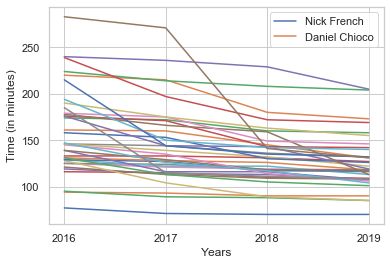

In [273]:
## loop for runners who participate in all 4 half marathon and getting faster each year.
import time
import datetime as dt
df_runners = df_regulars.query('(Time2019 < Time2018) & (Time2018 < Time2017) & (Time2017 < Time2016)')
df_runners = df_runners.reset_index(drop=True)

# setting the graph
fig = plt.figure()
graph = fig.add_subplot(111)

# x axis are the years
x_axis = [2016, 2017, 2018, 2019]
graph.set_xticks(x_axis)
graph.set_xticklabels(x_axis)


# for each runner
for i in range(0, len(df_runners)):

    # get time for each year
    _2016 = time.strptime(df_runners['Time2016'][i], "%H:%M:%S")
    _2017 = time.strptime(df_runners['Time2017'][i], "%H:%M:%S")
    _2018 = time.strptime(df_runners['Time2018'][i], "%H:%M:%S")
    _2019 = time.strptime(df_runners['Time2019'][i], "%H:%M:%S")

    # convert to minutes
    minutes_2016 = int(dt.timedelta(hours=_2016.tm_hour,minutes=_2016.tm_min,seconds=_2016.tm_sec).total_seconds() / 60)
    minutes_2017 = int(dt.timedelta(hours=_2017.tm_hour,minutes=_2017.tm_min,seconds=_2017.tm_sec).total_seconds() / 60)
    minutes_2018 = int(dt.timedelta(hours=_2018.tm_hour,minutes=_2018.tm_min,seconds=_2018.tm_sec).total_seconds() / 60)
    minutes_2019 = int(dt.timedelta(hours=_2019.tm_hour,minutes=_2019.tm_min,seconds=_2019.tm_sec).total_seconds() / 60)

    # print name and times
    print(df_runners['Name'][i] + ' : ' + str(minutes_2016) + ' - ' + str(minutes_2017) + ' - ' + str(minutes_2018) + ' - ' + str(minutes_2019))

    # y axis are the times
    y_axis = [minutes_2016, minutes_2017, minutes_2018, minutes_2019]

    # insert into graph
    graph.plot(x_axis, y_axis, label=i)

# add axis labels
plt.xlabel('Years')
plt.ylabel('Time (in minutes)')
plt.legend(labels=('Nick French','Daniel Chioco'))
# show graph
plt.show()